In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#set plotting to 'ggplot' style
plt.style.use('ggplot')

# 1. What do you notice about the data? Any issues?

In [2]:
# take a look at the top of the data
!head titanic_dropna.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,,C


In [3]:
# take a look at the bottom of the data
!tail titanic_dropna.csv

881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0,,S
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5,,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.05,,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,,Q


In [4]:
# read in the csv, using the lower case names and using the passenger_id column as the index
df = pd.read_csv('titanic_dropna.csv', header=0, index_col=0)

# lowercase names are easier to handler
df.columns = [x.lower() for x in df.columns]
df.index.name = 'pid'

In [5]:
# take a look at the dataframe
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
pid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
# see the info of the dataframe, check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
survived    712 non-null int64
pclass      712 non-null int64
name        712 non-null object
sex         712 non-null object
age         712 non-null float64
sibsp       712 non-null int64
parch       712 non-null int64
ticket      712 non-null object
fare        712 non-null float64
cabin       183 non-null object
embarked    712 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [7]:
# get a quick summary of the values.  Hint - the "mean" of "survived" is the overall survival rate
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


There are 712 rows of data, with 6 columns with numerical data and 5 columns with string type data.
All columns other than "cabin" have fully populated data. 
"cabin" only has 183 non-null rows, and may not be suitable for using in analysis.
The "name" column has non-standardized formats, and some cleaning may be needed.

# 2. What is the overall survival rate?

''

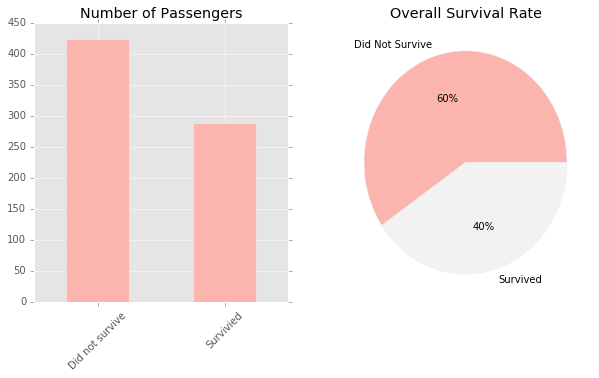

In [8]:
# Set the global default size of matplotlib figures to 10 inches wide by 5 inches tall
plt.rc('figure', figsize=(10, 5))

# plot overall survival numbers as bar chart
p1 = plt.subplot(1,2,1)
df['survived'].map({0:'Did not survive',1:'Survivied'}).value_counts().plot(kind='bar',title='Number of Passengers',cmap=plt.cm.get_cmap('Pastel1'))
p1.set_xticklabels(p1.xaxis.get_majorticklabels(), rotation=45)

# plot overall survival rate as pie chart
p2 = plt.subplot(1,2,2)
df['survived'].value_counts().plot(kind='pie', labels=['Did Not Survive','Survived'],autopct='%0.0f%%',
                                   title='Overall Survival Rate',cmap=plt.cm.get_cmap('Pastel1'),label='')

;


The describe() of the ['survived'] column and the graphs show that there were 712 total passengers with an overall survival rate of 40%.

# 3. What role does gender play in surviving?

In [9]:
# check impact of gender on survival rates
df.groupby('sex').describe()


age        fare       parch      pclass       sibsp  \
sex                                                                        
female count  259.000000  259.000000  259.000000  259.000000  259.000000   
       mean    27.745174   47.332433    0.714286    2.073359    0.644788   
       std     13.989760   61.517487    1.069045    0.843595    0.930367   
       min      0.750000    6.750000    0.000000    1.000000    0.000000   
       25%     18.000000   13.000000    0.000000    1.000000    0.000000   
       50%     27.000000   26.000000    0.000000    2.000000    0.000000   
       75%     36.000000   56.964600    1.000000    3.000000    1.000000   
       max     63.000000  512.329200    6.000000    3.000000    5.000000   
male   count  453.000000  453.000000  453.000000  453.000000  453.000000   
       mean    30.726645   27.268836    0.271523    2.335541    0.439294   
       std     14.678201   45.841889    0.651076    0.818748    0.923609   
       min      0.420000    0.000000    0.000000    1.000000    0.000000   
       25%     21.000000    7.895800    0.000000    2.000000    0.000000   
       50%     29.000000   13.000000    0.000000    3.000000    0.000000   
       75%     39.000000   28.500000    0.000000    3.000000    1.000000   
       max     80.000000  512.329200    5.000000    3.000000    5.000000   

                survived  
sex                       
female count  259.000000  
       mean     0.752896  
       std      0.432163  
       min      0.000000  
       25%      1.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
male   count  453.000000  
       mean     0.205298  
       std      0.404366  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

''

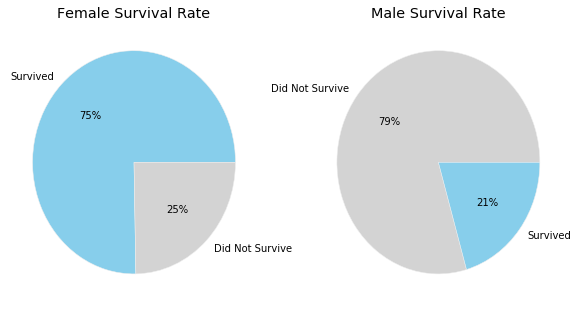

In [10]:
# Set the global default size of matplotlib figures to 10 inches wide by 5 inches tall
plt.rc('figure', figsize=(10, 5))

# plot overall survival rate as pie chart
p2 = plt.subplot(1,2,1)
df[df['sex']=='female']['survived'].value_counts().plot(kind='pie', labels=['Survived','Did Not Survive'],autopct='%0.0f%%',
                                   title='Female Survival Rate',colors=['skyblue','lightgray'],label='')
p2 = plt.subplot(1,2,2)
df[df['sex']=='male']['survived'].value_counts().plot(kind='pie', labels=['Did Not Survive','Survived'],autopct='%0.0f%%',
                                   title='Male Survival Rate',colors=['lightgray','skyblue'],label='')

;

The group description of the 'survived' column and pie charts show that there were 259 female passengers 
with a surval rate of 75%, while there were 453 male passengers with a survival rate of 21%.  
Gender seems to have had a noticeable impact on survival, where females survived at a much higher rate than males.

# 4. What role does class play in surviving?

In [11]:
# check impact of plass on survival rates
df.groupby('pclass').describe()


age        fare       parch       sibsp    survived
pclass                                                                  
1      count  184.000000  184.000000  184.000000  184.000000  184.000000
       mean    38.105543   88.048121    0.413043    0.456522    0.652174
       std     14.778904   81.293524    0.734061    0.634406    0.477580
       min      0.920000    0.000000    0.000000    0.000000    0.000000
       25%     27.000000   33.890600    0.000000    0.000000    0.000000
       50%     37.000000   67.950000    0.000000    0.000000    1.000000
       75%     49.000000  107.043750    1.000000    1.000000    1.000000
       max     80.000000  512.329200    4.000000    3.000000    1.000000
2      count  173.000000  173.000000  173.000000  173.000000  173.000000
       mean    29.877630   21.471556    0.404624    0.427746    0.479769
       std     14.001077   13.187429    0.705775    0.611645    0.501041
       min      0.670000   10.500000    0.000000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000    0.000000    0.000000
       50%     29.000000   15.045800    0.000000    0.000000    0.000000
       75%     36.000000   26.000000    1.000000    1.000000    1.000000
       max     70.000000   73.500000    3.000000    3.000000    1.000000
3      count  355.000000  355.000000  355.000000  355.000000  355.000000
       mean    25.140620   13.229435    0.456338    0.585915    0.239437
       std     12.495398   10.043158    0.971447    1.157303    0.427342
       min      0.420000    0.000000    0.000000    0.000000    0.000000
       25%     18.000000    7.775000    0.000000    0.000000    0.000000
       50%     24.000000    8.050000    0.000000    0.000000    0.000000
       75%     32.000000   15.741700    1.000000    1.000000    0.000000
       max     74.000000   56.495800    6.000000    5.000000    1.000000

''

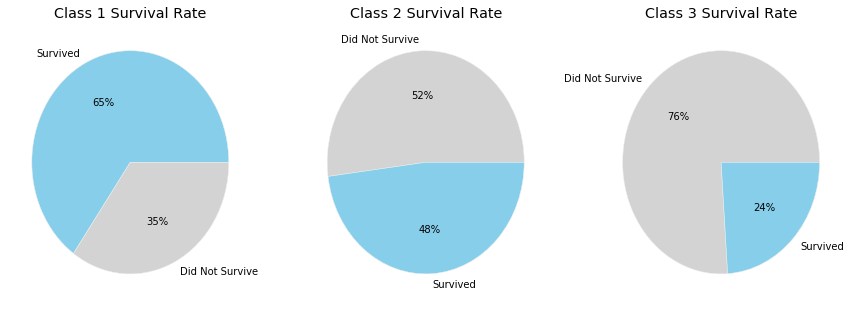

In [12]:
# Set the global default size of matplotlib figures to 10 inches wide by 5 inches tall
plt.rc('figure', figsize=(15, 5))

# plot overall survival rate as pie chart
p2 = plt.subplot(1,3,1)
df[df['pclass']==1]['survived'].value_counts().plot(kind='pie', labels=['Survived','Did Not Survive'],autopct='%0.0f%%',
                                   title='Class 1 Survival Rate',colors=['skyblue','lightgray'],label='')
p2 = plt.subplot(1,3,2)
df[df['pclass']==2]['survived'].value_counts().plot(kind='pie', labels=['Did Not Survive','Survived'],autopct='%0.0f%%',
                                   title='Class 2 Survival Rate',colors=['lightgray','skyblue'],label='')
p2 = plt.subplot(1,3,3)
df[df['pclass']==3]['survived'].value_counts().plot(kind='pie', labels=['Did Not Survive','Survived'],autopct='%0.0f%%',
                                   title='Class 3 Survival Rate',colors=['lightgray','skyblue'],label='')

;

The group description of the 'survived' column and pie charts show that there were 184 first class passengers 
with a surval rate of 65%, 173 class 2 passengers with a survival rate of 48%, and 355 class 3 passengers with a survival rate of 24%.
Class seems to have had a noticeable impact on survival, with higher classes having noticeably higher survival rates.

# 5. What role does age play in surviving?

In [13]:
# check out the age group stats
grp_age = df.groupby('age')
grp_age['survived'].agg(np.mean)

age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
           ...   
44.00    0.333333
45.00    0.416667
45.50    0.000000
46.00    0.000000
47.00    0.111111
48.00    0.666667
49.00    0.666667
50.00    0.500000
51.00    0.285714
52.00    0.500000
53.00    1.000000
54.00    0.375000
55.00    0.500000
55.50    0.000000
56.00    0.500000
57.00    0.000000
58.00    0.600000
59.00    0.000000
60.00    0.500000
61.00    0.000000
62.00    0.333333
63.00    1.000000
64.00    0.000000
65.00    0.000000
66.00 

In [14]:
# a bit hard to see trends so try grouping to age bins
df.groupby(pd.cut(df['age'],20)).agg(np.mean)

,survived,pclass,age,sibsp,parch,fare
age,,,,,,
"(0.34, 4.399]",0.675000,2.550000,2.254250,1.700000,1.375000,32.409063
"(4.399, 8.378]",0.642857,2.642857,6.500000,1.928571,1.285714,26.848807
"(8.378, 12.357]",0.266667,2.866667,9.866667,2.266667,1.600000,33.584167
"(12.357, 16.336]",0.483871,2.548387,15.209677,0.903226,0.548387,31.705787
"(16.336, 20.315]",0.341772,2.518987,18.531646,0.367089,0.278481,27.655854
"(20.315, 24.294]",0.367347,2.397959,22.520408,0.336735,0.316327,33.894640
"(24.294, 28.273]",0.352941,2.411765,26.511765,0.329412,0.188235,23.355096
"(28.273, 32.252]",0.416667,2.345238,30.369048,0.309524,0.178571,27.219790
"(32.252, 36.231]",0.479452,2.027397,34.609589,0.356164,0.260274,49.497144


''

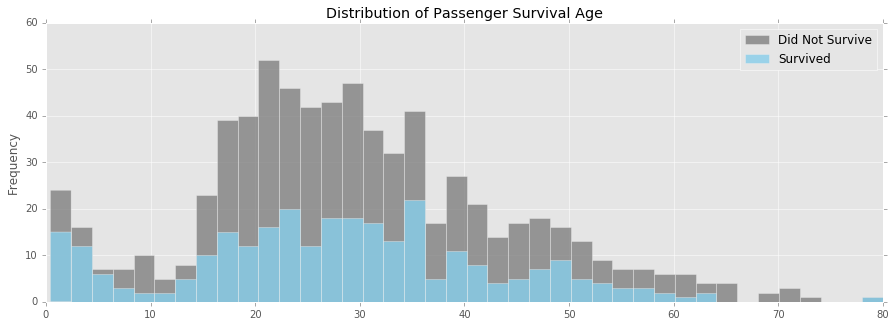

In [15]:
plt.rc('figure', figsize=(15, 5))
df['age'].plot(kind='hist', bins=40, label='Did Not Survive', color='gray', alpha=0.8,title='Distribution of Passenger Survival Age')
df[df['survived']==1]['age'].plot(kind='hist', bins=40, label='Survived', color='skyblue', alpha=0.8)
plt.legend(loc='best')
;


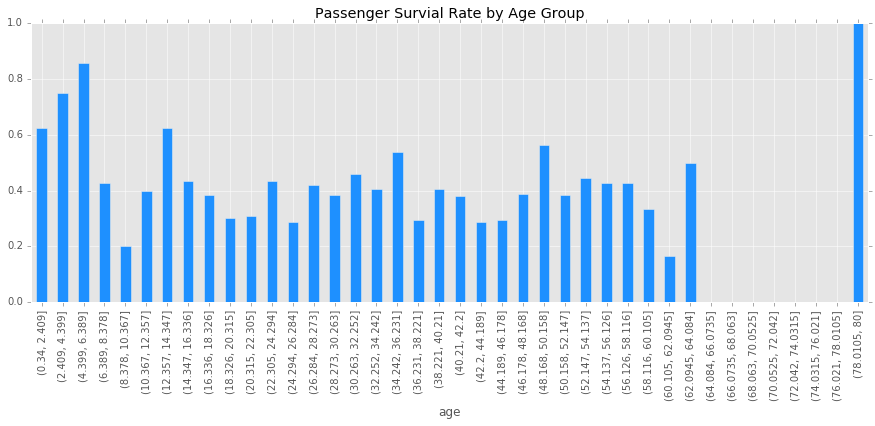

In [16]:
df.groupby(pd.cut(df['age'],40)).agg(np.mean)['survived'].plot(kind='bar', color='dodgerblue', title='Passenger Survial Rate by Age Group')

Children under the age of 7 had a higher rate of survival than the rest of the population, which is consistent with the "women and children first" policy of the crew. There one passenger who survived at age 80, but this seems more like an outlier.  The rest of the population had varying survival rates by age, but no other obvious trend is seen just from slicing by age.

# 6. Given the above, do you have any guesses on what predicts survival?

Women and children as well as passengers in higher classes had a higher rate of survival.

# 7. Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?

Looking at cross-relationships (gender/class/age)
Looking at family structure (sibsp and parch)
Looking at status and relationships implied by the names (Mr. Mrs. Sir Mme etc)
Looking at port of embarkment